In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [25]:
data = pd.read_csv(r"C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\lbf_historical_stats.csv")
data.head()

,temporada,torneo,posicion,club,jj,jg,je,jp,gf,gc,...,dif2,pts2,jj3,jg3,je3,jp3,gf3,gc3,dif3,pts3
0,2019-2020,Apertura,19,Necaxa,18,1,3,14,6,35,...,-9,5,9,0,1,8,0,20,-20,1
1,2022-2023,Apertura,9,Pumas,17,7,3,7,30,36,...,9,14,9,3,1,5,12,27,-15,10
2,2018-2019,Apertura,1,Tigres,16,12,4,0,51,19,...,17,18,8,7,1,0,26,11,15,22
3,2018-2019,Apertura,2,Pachuca,16,12,2,2,31,14,...,10,21,8,5,2,1,16,9,7,17
4,2018-2019,Apertura,3,América,16,11,2,3,28,12,...,7,18,8,5,2,1,15,6,9,17


In [27]:
features = ["gf","gc"]
target="posicion"

In [29]:
data=data.dropna(subset=features+[target])
data=data[data[target].apply(lambda x: str(x).isdigit())]

In [31]:
data[target]=data[target].astype(int)
data["rank_group"] = pd.qcut(data[target], q=3, labels=["Bottom", "Mid", "Top"])  # Terciles

In [33]:
le = LabelEncoder()
data["rank_group"]=le.fit_transform(data["rank_group"])

In [35]:
X = data[features].values
y = data["rank_group"].values

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

In [45]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

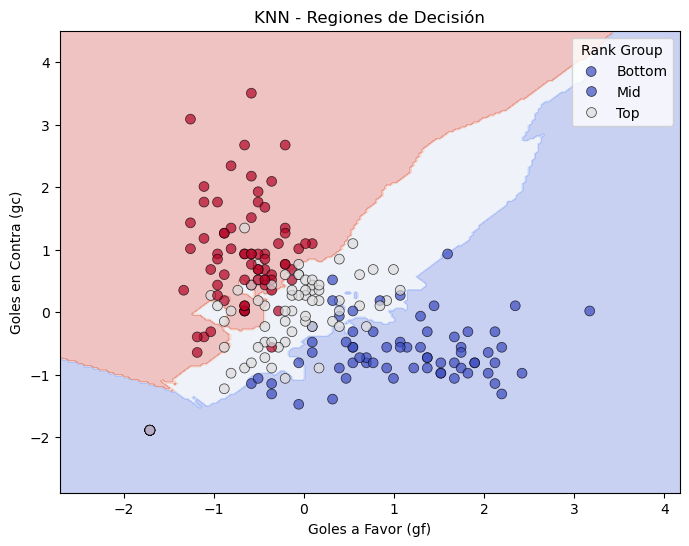

In [47]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="coolwarm", edgecolor="k", s=50, alpha=0.7)
plt.xlabel("Goles a Favor (gf)")
plt.ylabel("Goles en Contra (gc)")
plt.title("KNN - Regiones de Decisión")
plt.legend(title="Rank Group", labels=["Bottom", "Mid", "Top"])
plt.show()

In [5]:
%pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


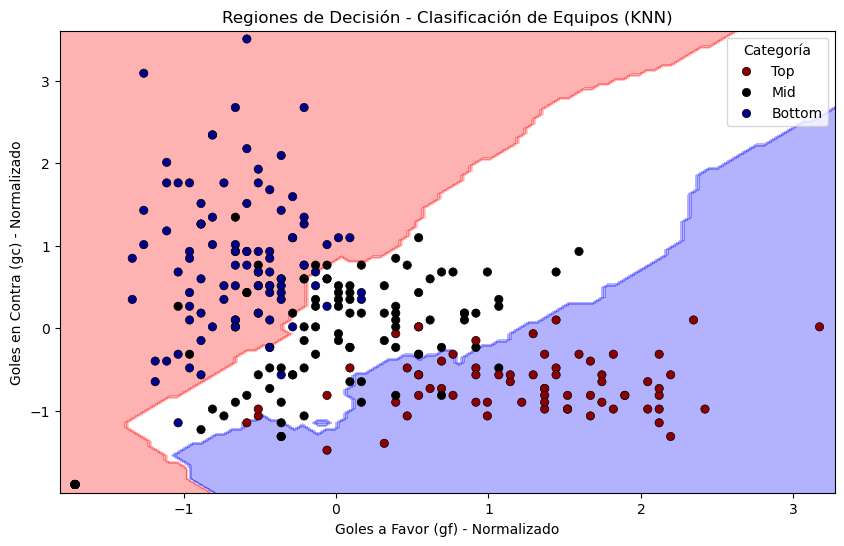

,club,gf,gc,posicion,rank_group,Predicted_Category
0,Necaxa,6,35,19,Bottom,Bottom
1,Pumas,30,36,9,Mid,Mid
2,Tigres,51,19,1,Top,Top
3,Pachuca,31,14,2,Top,Top
4,América,28,12,3,Top,Top
...,...,...,...,...,...,...
264,Tijuana,0,0,4,Top,Bottom
265,Cruz Azul,0,0,5,Top,Bottom
266,FC Juárez,0,0,6,Mid,Bottom
267,Querétaro,0,0,7,Mid,Bottom


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap


# Cargar el dataset
file_path = r"C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\lbf_historical_stats.csv"
data = pd.read_csv(file_path)

# Seleccionar características relevantes
data_filtered = data[['gf', 'gc', 'posicion', 'club']].dropna()

# Crear etiquetas de clasificación
bins = [1, 6, 12, np.inf]  # Dividir posiciones en categorías
labels = ["Top", "Mid", "Bottom"]
data_filtered["rank_group"] = pd.cut(data_filtered["posicion"], bins=bins, labels=labels, right=False)

# Codificar etiquetas
label_encoder = LabelEncoder()
data_filtered["rank_group_encoded"] = label_encoder.fit_transform(data_filtered["rank_group"])

# Seleccionar características y objetivo
X = data_filtered[['gf', 'gc']]
y = data_filtered["rank_group_encoded"]

# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Crear malla para visualización de regiones de decisión
x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1
y_min, y_max = X_scaled[:, 1].min() - 0.1, X_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predecir para cada punto de la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Definir colores
cmap_light = ListedColormap(['red', 'white', 'blue'])  # Bottom, Mid, Top
cmap_bold = ['darkred', 'black', 'darkblue']

# Graficar regiones de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data_filtered["rank_group"], palette=cmap_bold, edgecolor="k")

# Etiquetas
plt.xlabel("Goles a Favor (gf) - Normalizado")
plt.ylabel("Goles en Contra (gc) - Normalizado")
plt.title("Regiones de Decisión - Clasificación de Equipos (KNN)")
plt.legend(title="Categoría")

plt.show()

# Crear tabla con clubes y su clasificación predicha
data_filtered["Predicted_Category"] = label_encoder.inverse_transform(knn.predict(X_scaled))

# Mostrar tabla con equipos y clasificación
display(data_filtered[['club', 'gf', 'gc', 'posicion', 'rank_group', 'Predicted_Category']])

In [9]:
# Guardar el DataFrame en un archivo CSV
data_filtered.to_csv("clubes_clasificacion_predicha.csv", index=False)

# Descargar el archivo en Jupyter Notebook
import shutil
from IPython.display import FileLink

shutil.move("clubes_clasificacion_predicha.csv", r"C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\clubes_clasificacion_predicha.csv")
FileLink(r"C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\clubes_clasificacion_predicha.csv")


C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\clubes_clasificacion_predicha.csv